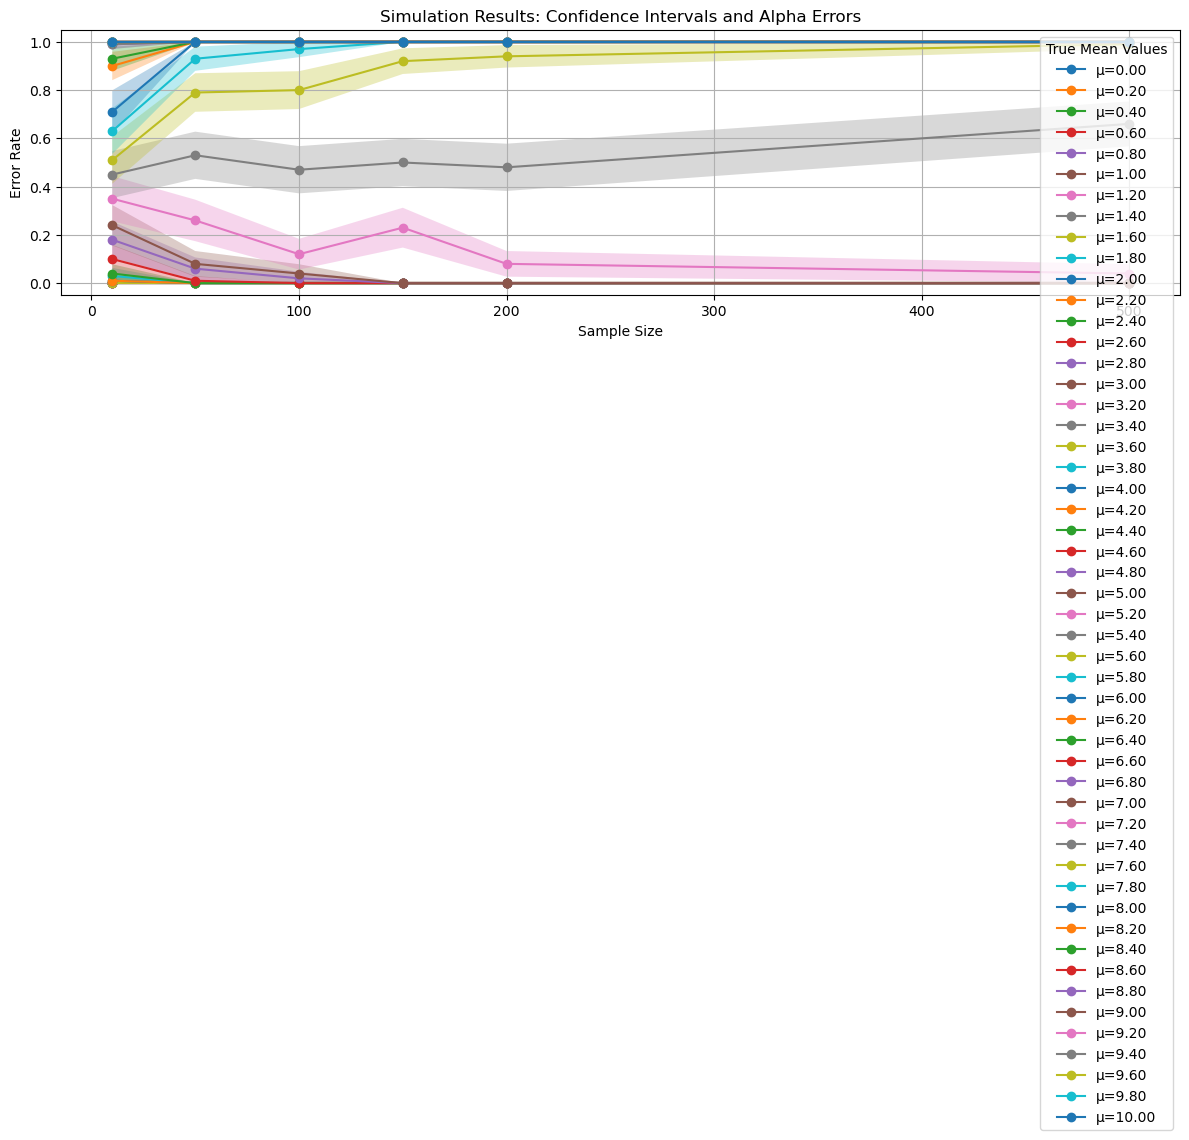

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

NUM_SIMULATIONS = 100
SAMPLE_SIZES = [10, 50, 100, 150, 200, 500]
ALPHA = 0.05
TRUE_MEANS = np.linspace(0, 10, 51)

def compute_confidence_interval(sample, alpha=0.05):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Используем стандартное отклонение выборки
    t_critical = stats.t.ppf(1 - alpha/2, df=len(sample) - 1)
    margin_of_error = sample_std * t_critical / np.sqrt(len(sample))

    return sample_mean - margin_of_error, sample_mean + margin_of_error

error_rates = {}
lower_bound_intervals = {}
upper_bound_intervals = {}

for true_mean in TRUE_MEANS:
    error_rate = []
    lower_intervals = []
    upper_intervals = []

    for n in SAMPLE_SIZES:
        count_success = 0
        for _ in range(NUM_SIMULATIONS):
            sample = np.random.normal(loc=true_mean, scale=1, size=n)
            estimated = np.mean((sample > -5) & (sample < 5))
            if estimated >= (1 - ALPHA):
                count_success += 1

        lower, upper = proportion_confint(NUM_SIMULATIONS - count_success, NUM_SIMULATIONS, alpha=ALPHA)
        lower_intervals.append(lower)
        upper_intervals.append(upper)
        error_rate.append(1 - count_success / NUM_SIMULATIONS)

    error_rates[true_mean] = error_rate
    lower_bound_intervals[true_mean] = lower_intervals
    upper_bound_intervals[true_mean] = upper_intervals

plt.figure(figsize=(12, 8))

for true_mean in TRUE_MEANS:
    plt.plot(SAMPLE_SIZES, error_rates[true_mean], marker='o', label=f"μ={true_mean:.2f}")
    plt.fill_between(SAMPLE_SIZES, lower_bound_intervals[true_mean], upper_bound_intervals[true_mean], alpha=0.3)

plt.title("Simulation Results: Confidence Intervals and Alpha Errors")
plt.xlabel("Sample Size")
plt.ylabel("Error Rate")
plt.grid(True)
plt.legend(loc="upper right", title="True Mean Values")
plt.tight_layout()
plt.show()
